In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trainData = pd.read_csv("D:\\prisha_manipal_sp\\manas\\Train.csv")
testData = pd.read_csv("D:\\prisha_manipal_sp\\manas\\Test.csv")

In [3]:
print(trainData.info())
print(testData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3750 non-null   int64  
 1   Name               3750 non-null   object 
 2   Location           3750 non-null   object 
 3   Year               3750 non-null   int64  
 4   Kilometers_Driven  3750 non-null   int64  
 5   Fuel_Type          3750 non-null   object 
 6   Transmission       3750 non-null   object 
 7   Owner_Type         3750 non-null   object 
 8   Mileage            3749 non-null   object 
 9   Engine             3722 non-null   object 
 10  Power              3722 non-null   object 
 11  Seats              3718 non-null   float64
 12  Price              3750 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 381.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 13 columns

In [ ]:
# pre processing the data

In [4]:
trainData.drop(['Unnamed: 0', 'Name', 'Location'], axis=1, inplace=True)

In [5]:
numeric_columns = ["Mileage", "Engine", "Power"]
for col in numeric_columns:
    trainData[col] = trainData[col].fillna("0").astype(str).str.extract(r"([0-9]*\.?[0-9]+)").astype(float)

In [6]:
for col in numeric_columns + ['Seats']:
    trainData[col].fillna(trainData[col].median(), inplace=True)

In [7]:
trainData['Price'].fillna(trainData['Price'].median(), inplace=True)

In [8]:
categorical_columns = ["Fuel_Type", "Transmission", "Owner_Type"]
trainData = pd.get_dummies(trainData, columns=categorical_columns, drop_first=True)

In [9]:
X = trainData.drop(columns=['Price'], axis=1).values  # Features
y = trainData['Price'].values.reshape(-1, 1)          # Target

In [ ]:
# defining standardizing function

In [10]:
def standardize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std == 0] = 1  # Avoid division by zero
    X_standardized = (X - mean) / std
    return X_standardized, mean, std

X, X_mean, X_std = standardize_features(X)

# Add the intercept term
X = np.c_[np.ones(X.shape[0]), X]  

In [11]:
theta = np.zeros((X.shape[1], 1))  # Initialize theta with zeros
learning_rate = 0.001
iterations = 1000

In [ ]:
# defining cost computing function

In [12]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [ ]:
# defining gradient descent algorithm

In [53]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))
    
    return theta, cost_history

In [14]:
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)


In [ ]:
# applying algorithm to predict car values

In [15]:
y_pred_train = X.dot(theta)

In [17]:
mse_train = np.mean((y - y_pred_train) ** 2)
rmse_train = np.sqrt(mse_train)

ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred_train) ** 2)
r2_train = 1 - (ss_residual / ss_total)

print(f"training MSE: {mse_train}")
print(f"training RMSE: {rmse_train}")
print(f"training R2: {r2_train}")

training MSE: 56.35798248341282
training RMSE: 7.507195380660664
training R2: 0.5512259443219896


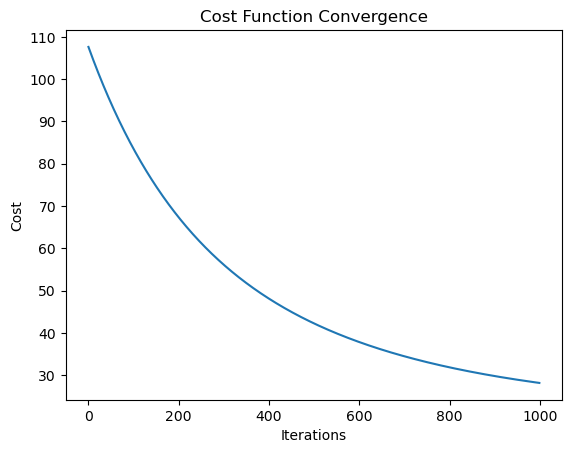

In [18]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()

In [ ]:
# applying 

In [35]:
testData = pd.read_csv("D:\\prisha_manipal_sp\\manas\\Test.csv")

In [36]:
testData.drop(['Unnamed: 0', 'Name', 'Location'], axis=1, inplace=True)
y_test = testData['Price'].values

In [37]:
for col in numeric_columns:  
    testData[col] = testData[col].fillna("0").astype(str).str.extract(r"([0-9]*\.?[0-9]+)").astype(float)

In [38]:
for col in numeric_columns + ['Seats']:
    testData[col].fillna(testData[col].median(), inplace=True)

In [39]:
testData = pd.get_dummies(testData, columns=categorical_columns, drop_first=True)

In [40]:
testData = testData[trainData.drop(columns=['Price']).columns]

In [41]:
X_test = testData.values
X_test = (X_test - X_mean) / X_std
X_test = np.c_[np.ones(X_test.shape[0]), X_test]  

In [42]:
y_pred_test = X_test.dot(theta)

In [51]:
mse = np.mean((y_test - y_pred_test) ** 2)
print(f"MSE Error: {mse}")

MSE Error: 213.0849300255349


In [52]:
rmse = np.sqrt(mse)
print(f"RMSE Error: {rmse}")

RMSE Error: 14.597428884071842


In [48]:
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)  # total sum of squares
ss_residual = np.sum((y_test - y_pred_test) ** 2)  # residual sum of squares
r_squared = 1 - (ss_residual / ss_total)
print(f"r-squared Score: {r_squared}")

r-squared Score: -2147.4028874964993


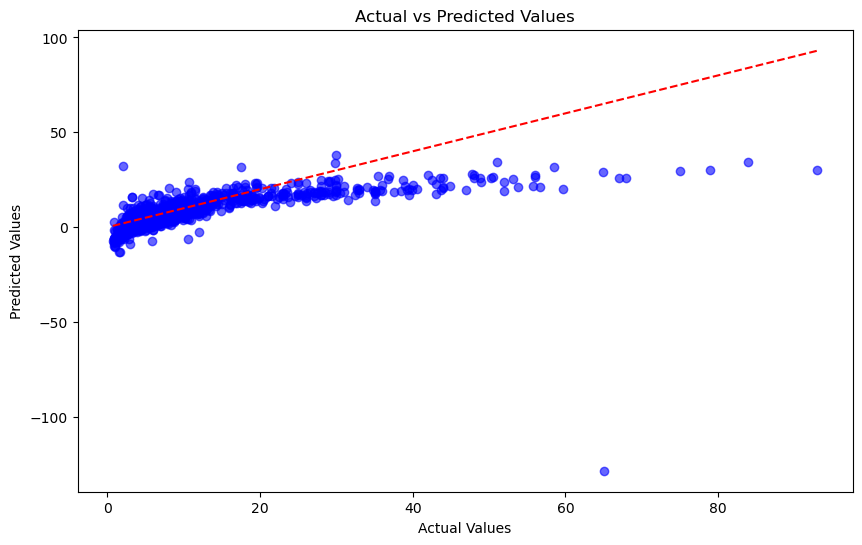

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()